### Load libraries

In [1]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
import pandas as pd


import matplotlib.pyplot as plt
import numpy as np

## Parameters

In [4]:
f_size = 20
lattices = ['Hex','Square']
materials = ['Au','Ag',r'SiO$_{x}$']

### Load data

In [5]:
df = pd.read_csv('../DL-Assisted-NHA-Inverse-Design-/Dataset 6655.csv')

In [6]:
df['Spectra'] = df.values[:,5:][:,::-1].tolist()
df.drop(df.columns[5:-1], axis=1, inplace=True)
df.columns = ['Lattice','Material','Thickness','Radius','Pitch','Spectra']

In [7]:
df

,Lattice,Material,Thickness,Radius,Pitch,Spectra
0,0,0,100,100,480,"[0.0863316, 0.0862488, 0.0865498, 0.0875425, 0..."
1,0,0,100,100,485,"[0.0823065, 0.0820889, 0.0822475, 0.082661, 0...."
2,0,0,100,100,490,"[0.0805287, 0.0801679, 0.0800869, 0.080199, 0...."
3,0,0,100,100,495,"[0.0749868, 0.0745899, 0.0744098, 0.0743773, 0..."
4,0,0,100,100,500,"[0.0719014, 0.0716504, 0.0712684, 0.0708749, 0..."
...,...,...,...,...,...,...
6649,1,1,150,150,505,"[0.00501566, 0.00493485, 0.00497218, 0.0051334..."
6650,1,1,150,150,510,"[0.00509763, 0.00484803, 0.00471791, 0.0046936..."
6651,1,1,150,150,515,"[0.00446375, 0.00406498, 0.00381866, 0.0037215..."
6652,1,1,150,150,520,"[0.00708159, 0.0061911, 0.00543434, 0.00482544..."


### Inspect data

In [8]:
df['Lattice'].sort_values().unique()

array([0, 1])

In [9]:
df['Material'].sort_values().unique()

array([0, 1, 2])

In [10]:
df['Radius'].sort_values().unique()

array([ 50,  55,  60,  65,  70,  75,  80,  85,  90,  95, 100, 105, 110,
       115, 120, 125, 130, 135, 140, 145, 150])

In [11]:
df['Thickness'].sort_values().unique()

array([100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150])

In [12]:
df['Pitch'].sort_values().unique()

array([475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525])

### Plot random data

In [13]:
wl_min, wl_max, n_wl = 500.0, 1100.0, 200
wavelenghts = np.linspace(wl_min,wl_max,n_wl)

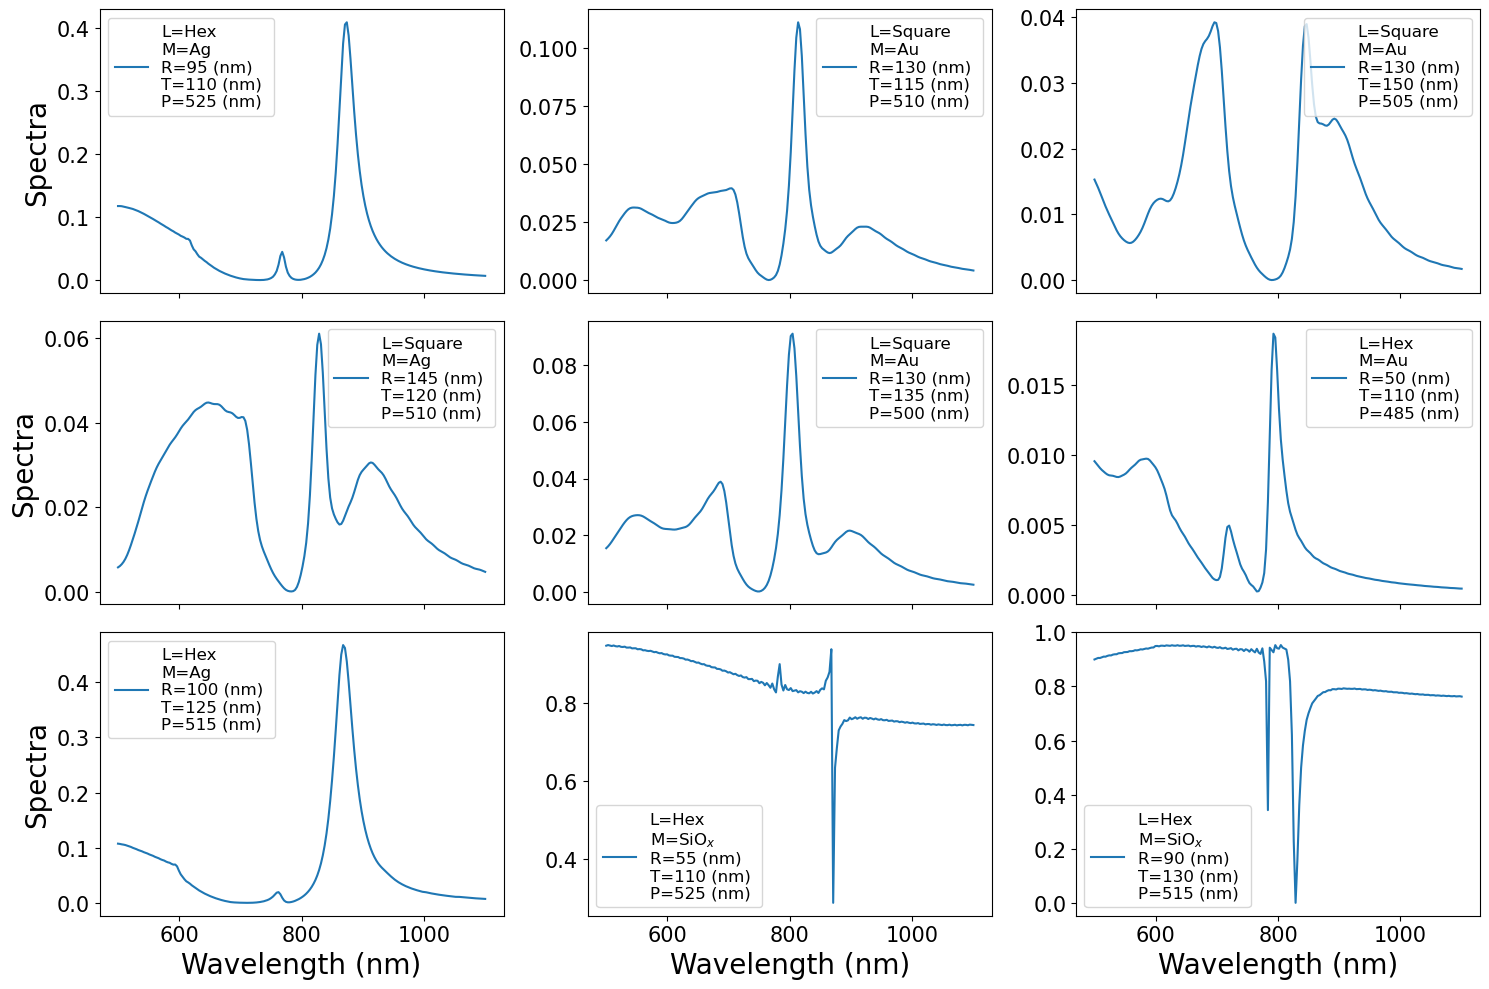

In [14]:
fig,axs = plt.subplots(3,3,figsize = (15,10),sharex=True,sharey=False)
samples = np.random.randint(0,6553,9)

for i in range(3):
    for j in range(3):

        # plot
        idx = samples[i*3+j]
        legend_str = 'L=' + str(lattices[df['Lattice'].iloc[idx]]) + '\n' \
                     'M=' + str(materials[df['Material'].iloc[idx]]) + '\n' \
                     'R=' + str(df['Radius'].iloc[idx]) + ' (nm) \n' \
                     'T=' + str(df['Thickness'].iloc[idx]) + ' (nm) \n' \
                     'P=' + str(df['Pitch'].iloc[idx]) + ' (nm)'
        axs[i,j].plot(wavelenghts,df['Spectra'].iloc[idx],label=legend_str)

        # labels
        if i==2:
            axs[i,j].set_xlabel('Wavelength (nm)',fontsize= f_size)
        if j==0:
            axs[i,j].set_ylabel('Spectra',fontsize= f_size)

        # ticks
        axs[i,j].tick_params(labelsize=f_size-5)

        # legend
        legend_str = 'Lattice=' + str(df['Lattice'].iloc[idx]) + '\n'
        axs[i,j].legend(fontsize=f_size-8)

fig.set_tight_layout('tight')

### Plot data slices

In [15]:
L = 0  # lattice
M = 0  # material
R = 100  # radius
T = 125  # thickness
P = 500  # pitch
df_pitch = df[(df.Lattice==L) & (df.Material==M) & (df.Radius==R) & (df.Thickness==T)]
df_pitch.sort_values(by=['Pitch'],inplace=True)
df_radius = df[(df.Lattice==L) & (df.Material==M) & (df.Pitch==P) & (df.Thickness==T)]
df_radius.sort_values(by=['Radius'],inplace=True)
df_pitch

/tmp/ipykernel_972756/1222833339.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pitch.sort_values(by=['Pitch'],inplace=True)
/tmp/ipykernel_972756/1222833339.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_radius.sort_values(by=['Radius'],inplace=True)


,Lattice,Material,Thickness,Radius,Pitch,Spectra
604,0,0,125,100,475,"[0.0605793, 0.0606152, 0.05966, 0.0578818, 0.0..."
605,0,0,125,100,480,"[0.0546801, 0.0549387, 0.0555701, 0.0566091, 0..."
606,0,0,125,100,485,"[0.0513038, 0.0515739, 0.0519746, 0.0523404, 0..."
607,0,0,125,100,490,"[0.0501283, 0.0501638, 0.0503948, 0.0506691, 0..."
608,0,0,125,100,495,"[0.046373, 0.0465361, 0.0467308, 0.0468175, 0...."
609,0,0,125,100,500,"[0.0436737, 0.0436841, 0.0437838, 0.0438387, 0..."
610,0,0,125,100,505,"[0.0432856, 0.0431156, 0.0431154, 0.0432495, 0..."
611,0,0,125,100,510,"[0.0383239, 0.0381056, 0.0379869, 0.0380535, 0..."
612,0,0,125,100,515,"[0.0374084, 0.0372963, 0.0372178, 0.0371021, 0..."
613,0,0,125,100,520,"[0.0356083, 0.0353689, 0.0352584, 0.0351937, 0..."


In [16]:
df_radius

,Lattice,Material,Thickness,Radius,Pitch,Spectra
620,0,0,125,50,500,"[0.00464869, 0.00454595, 0.00446897, 0.0043975..."
631,0,0,125,55,500,"[0.00552272, 0.00543442, 0.00532898, 0.0052417..."
642,0,0,125,60,500,"[0.00643668, 0.00632563, 0.0062001, 0.00610014..."
653,0,0,125,65,500,"[0.00829194, 0.0081518, 0.00804628, 0.00796862..."
664,0,0,125,70,500,"[0.0101601, 0.0100404, 0.00991966, 0.00983909,..."
675,0,0,125,75,500,"[0.0132838, 0.0131794, 0.0130644, 0.0129722, 0..."
686,0,0,125,80,500,"[0.0172489, 0.0171585, 0.0170363, 0.0169342, 0..."
697,0,0,125,85,500,"[0.0216707, 0.0215216, 0.0214272, 0.02142, 0.0..."
708,0,0,125,90,500,"[0.0279444, 0.027888, 0.0278828, 0.0278484, 0...."
719,0,0,125,95,500,"[0.0363637, 0.0363297, 0.0363788, 0.0363983, 0..."


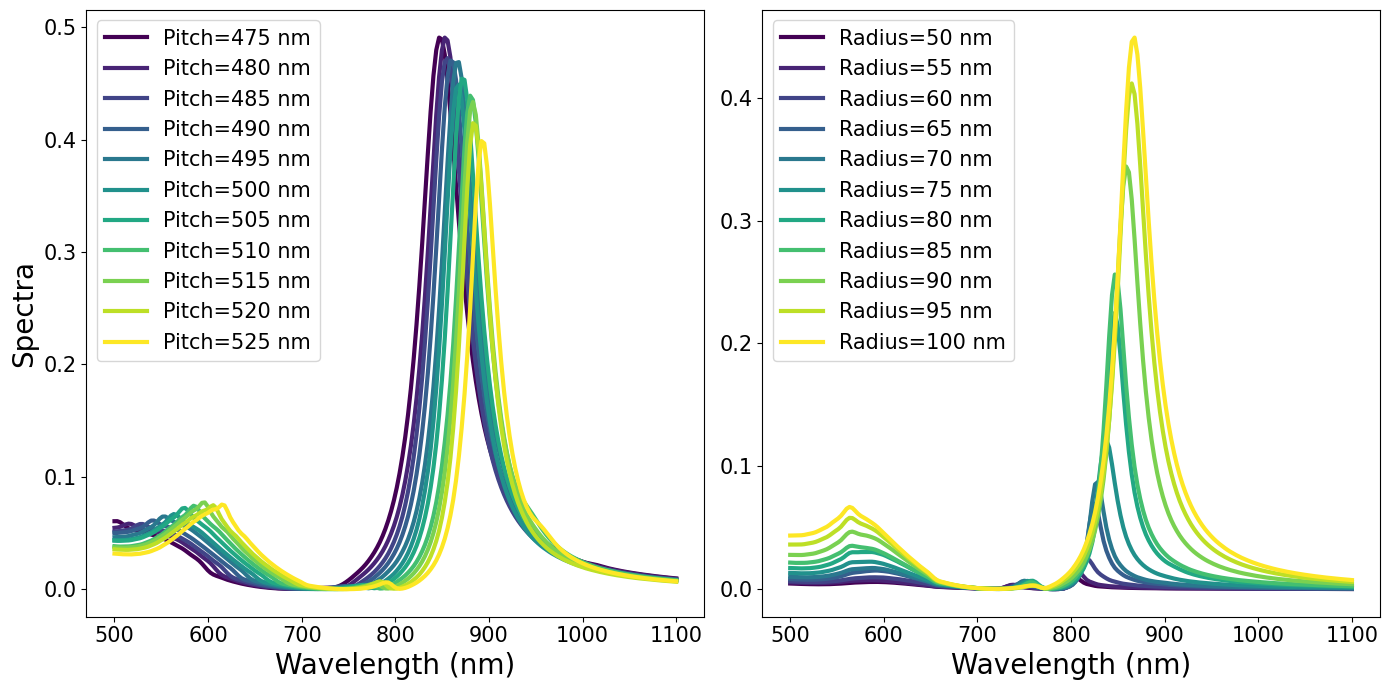

In [17]:
fig,axs = plt.subplots(1,2,figsize = (14,7))
colors = plt.cm.viridis(np.linspace(0,1,len(df_pitch)))


for i in range(len(df_pitch)):
        axs[0].plot(wavelenghts,df_pitch['Spectra'].iloc[i],lw=3,color=colors[i],label='Pitch=' + str(df_pitch['Pitch'].iloc[i]) + ' nm')
        axs[1].plot(wavelenghts,df_radius['Spectra'].iloc[i],lw=3,color=colors[i],label='Radius=' + str(df_radius['Radius'].iloc[i]) + ' nm')

        # labels
        axs[0].set_xlabel('Wavelength (nm)',fontsize= f_size)
        axs[1].set_xlabel('Wavelength (nm)',fontsize= f_size)
        axs[0].set_ylabel('Spectra',fontsize= f_size)
        axs[1].set_ylabel('')

        # ticks
        axs[0].tick_params(labelsize=f_size-5)
        axs[1].tick_params(labelsize=f_size-5)

        # legend
        axs[0].legend(fontsize=f_size-5)
        axs[1].legend(fontsize=f_size-5)

fig.set_tight_layout('tight')

In [18]:
X_df = df[['Lattice','Material','Thickness','Radius','Pitch']]
y_df = df['Spectra']
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.33, random_state=42)

In [20]:
X_df.iloc[3]

Lattice        0
Material       0
Thickness    100
Radius       100
Pitch        495
Name: 3, dtype: int64